In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from analysis.datasets import *
from analysis.first_analysis import *
from analysis.explorative_analysis import *
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import weibull_min
from scipy.special import gamma
import scipy.stats as stats

In [2]:
#pd.set_option('display.max_columns', None)  # Show all columns
#pd.set_option('display.max_rows', None)     # Show all rows

### Loading raw 50Hertz Data

In [2]:
aggregated_power = load_entsoe()
aggregated_power

,offshore,onshore
time,,
2016-01-01 00:00:00,21.0,1428.0
2016-01-01 00:15:00,27.0,1379.0
2016-01-01 00:30:00,24.0,1399.0
2016-01-01 00:45:00,20.0,1448.0
2016-01-01 01:00:00,16.0,1517.0
...,...,...
2024-12-31 22:45:00,NaN,NaN
2024-12-31 23:00:00,NaN,NaN
2024-12-31 23:15:00,NaN,NaN


### explorative_analysis

Summary statistics for time frame: 2016-01-01 - 2024-12-31
First 5 rows of the dataframe:


,offshore,onshore
time,,
2016-01-01 00:00:00,21.0,1428.0
2016-01-01 00:15:00,27.0,1379.0
2016-01-01 00:30:00,24.0,1399.0
2016-01-01 00:45:00,20.0,1448.0
2016-01-01 01:00:00,16.0,1517.0



Last 5 rows of the dataframe:


,offshore,onshore
time,,
2024-12-31 22:45:00,NaN,NaN
2024-12-31 23:00:00,NaN,NaN
2024-12-31 23:15:00,NaN,NaN
2024-12-31 23:30:00,NaN,NaN
2024-12-31 23:45:00,NaN,NaN



Summary statistics of the dataframe for time frame: 2016-01-01 - 2024-12-31


,offshore,onshore
count,307842.000000,307842.000000
mean,369.573703,3727.880780
std,346.738522,3359.502551
min,0.000000,0.000000
25%,75.000000,1109.250000
50%,272.000000,2634.000000
75%,600.000000,5413.750000
max,1480.000000,16676.000000


Expected number of entries: 315648 (2016-01-01 00:00:00 - 2024-12-31 23:45:00) 
Actual number of entries: 315648

Shape of dataframe (rows, columns) for time frame: 2016-01-01 - 2024-12-31


(315648, 2)

No duplicates found in the index.

Rows with NaN values for onshore:
In total there are: 7806 NaN values for time frame 2016-01-01 00:00:00 - 2024-12-31 23:45:00

First NaN value in 'onshore' found at index: 2024-10-11 16:30:00


,offshore,onshore
time,,
2024-10-11 16:30:00,NaN,NaN
2024-10-11 16:45:00,NaN,NaN
2024-10-11 17:00:00,NaN,NaN
2024-10-11 17:15:00,NaN,NaN
2024-10-11 17:30:00,NaN,NaN
...,...,...
2024-12-31 22:45:00,NaN,NaN
2024-12-31 23:00:00,NaN,NaN
2024-12-31 23:15:00,NaN,NaN


Plotting histogram for: onshore for 2016-01-01 - 2024-12-31


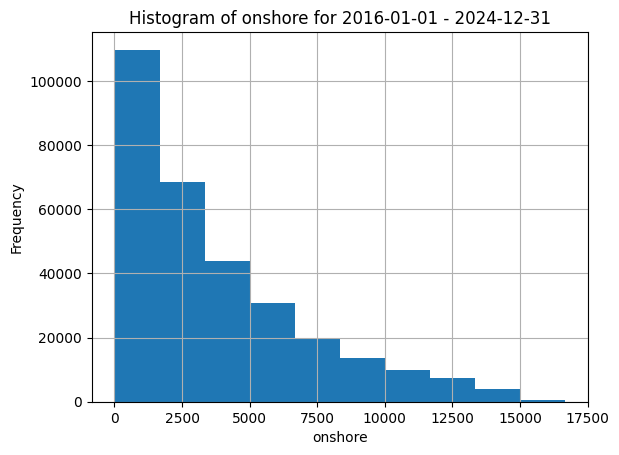


Plotting monthly time series of onshore data for the time period 2016-01-01 - 2024-12-31:


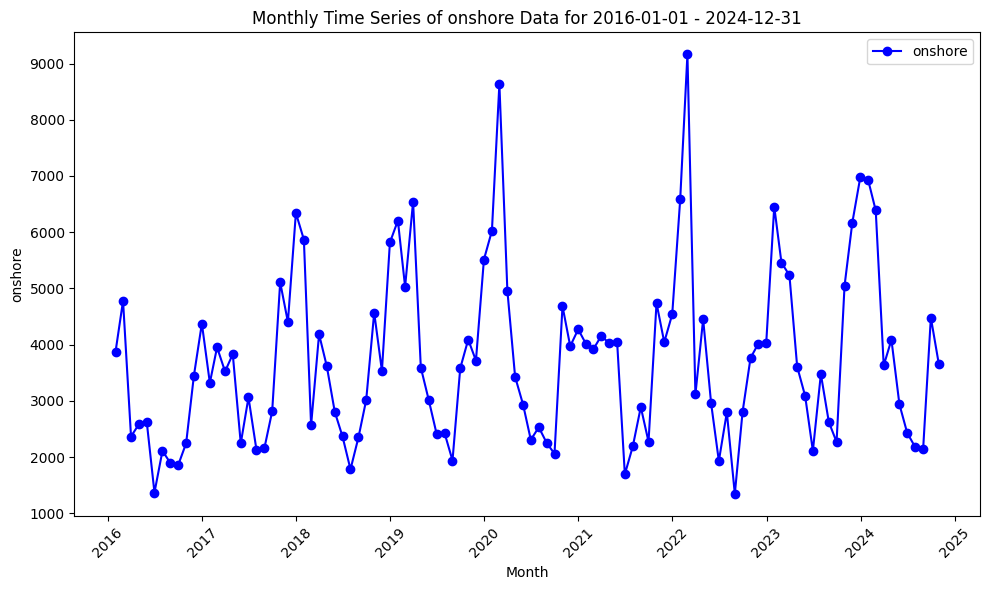

No wind speed columns found. Skipping wind speed plots.
Filtered data for onshore in 01/2019: 2976 records found.


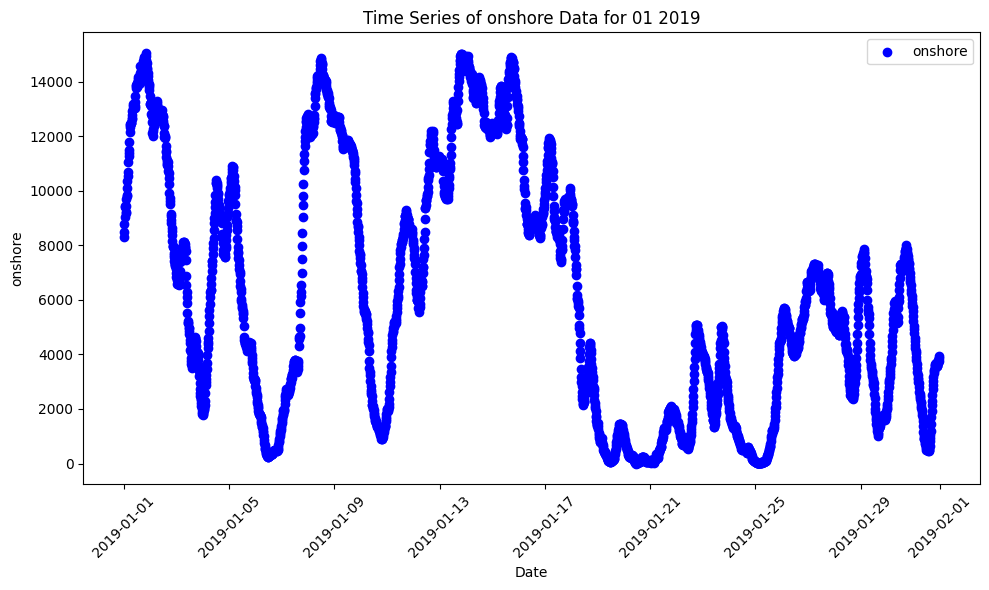

In [3]:
explorative_analysis(aggregated_power)

In [5]:
aggregated_power_proc = aggregated_power.drop(columns='offshore')

### First Analyses

#### I want to analyze for each 15 minute interval which distribution fits the data best. To this end, I turn the data frame into new one with index = day and 96 columns (24 * 4 as there are 4 15 minute intervals per hour) (both onshore and offshore i.e. 192 in total)

In [50]:
reshaped = minute_to_daily_50Hertz(aggregated_power)
reshaped

,offshore_00_00,offshore_00_15,offshore_00_30,offshore_00_45,offshore_01_00,offshore_01_15,offshore_01_30,offshore_01_45,offshore_02_00,offshore_02_15,...,onshore_21_30,onshore_21_45,onshore_22_00,onshore_22_15,onshore_22_30,onshore_22_45,onshore_23_00,onshore_23_15,onshore_23_30,onshore_23_45
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,21.0,27.0,24.0,20.0,16.0,14.0,8.0,5.0,5.0,6.0,...,316.0,350.0,359.0,385.0,425.0,432.0,467.0,503.0,509.0,528.0
2016-01-02,208.0,226.0,235.0,260.0,292.0,303.0,295.0,280.0,287.0,285.0,...,6813.0,6809.0,6785.0,6760.0,6790.0,6771.0,6700.0,6682.0,6672.0,6721.0
2016-01-03,320.0,320.0,321.0,320.0,321.0,321.0,321.0,320.0,321.0,321.0,...,5377.0,5335.0,5253.0,5296.0,5265.0,5255.0,5255.0,5239.0,5234.0,5220.0
2016-01-04,319.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,320.0,...,2284.0,2195.0,2177.0,2173.0,2165.0,2183.0,2194.0,2136.0,2100.0,2050.0
2016-01-05,320.0,319.0,319.0,320.0,319.0,319.0,319.0,320.0,319.0,319.0,...,1475.0,1441.0,1391.0,1414.0,1420.0,1397.0,1353.0,1341.0,1218.0,1121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analyse the daily time series for each 15-minute interval separately by fitting a Weibull distribution to the time series data for each 15-minute. To be more flexible fit a Weibull distribution rather than a Gaussian distribution. The most important parameter is the "shape" parameter. For "shape" <= 1 the maximum of the distribution is at zero; for "shape" > 1 the maximum is above zero. The scale parameter simply says how large the variable can be

Why weibull? its a flexible distribution because the shape parameter allows for distributions that peak at zero and distributions that ressemble the normal distribution


Plotting the values for the other parameter (scale) which is only relevant for normalization

In [7]:
# Calculate Weibull MLEs
mles = get_weibull_mles(reshaped)
mles

,time_interval,shape,scale,th_mean,mean,error
0,offshore_00_00,0.943828,368.103687,377.909538,378.276271,-0.000969
1,offshore_00_15,0.934357,365.128671,376.727236,377.044902,-0.000843
2,offshore_00_30,0.930655,362.551055,374.814331,375.080761,-0.000710
3,offshore_00_45,0.930445,360.975112,373.227560,373.559089,-0.000887
4,offshore_01_00,0.923041,357.583080,371.229777,371.502339,-0.000734
...,...,...,...,...,...,...
187,onshore_22_45,1.252746,4328.702775,4029.673580,4024.471304,0.001293
188,onshore_23_00,1.249402,4310.649440,4015.307062,4010.149095,0.001286
189,onshore_23_15,1.245312,4292.834732,4001.722830,3996.628197,0.001275
190,onshore_23_30,1.241225,4274.951816,3988.090456,3983.315346,0.001199


### Taking only onshore into consideration

In [8]:
onshore_mles = mles[mles['time_interval'].str.startswith('onshore')]

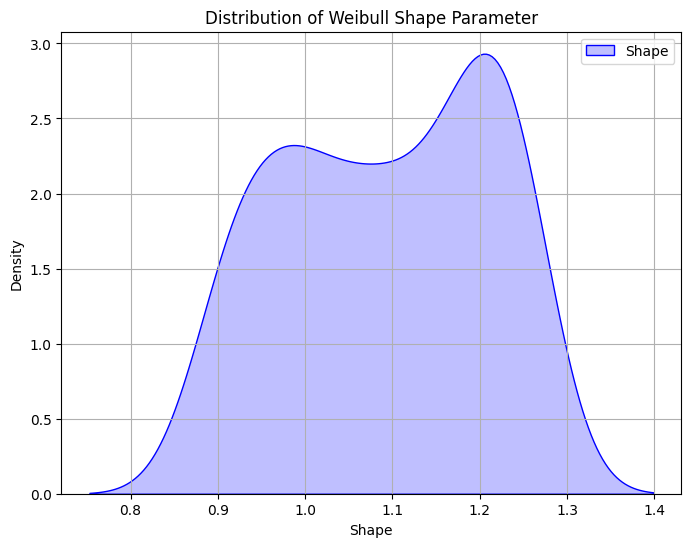

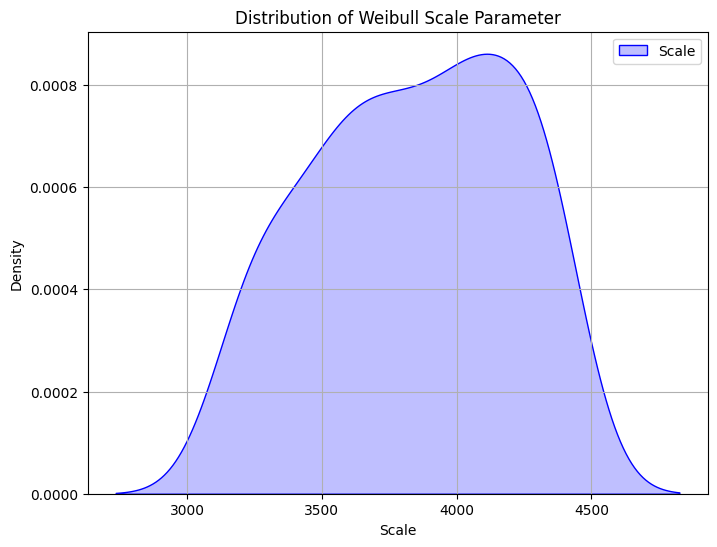

In [9]:
# Calculate Weibull MLEs
mles = get_weibull_mles(reshaped)

# Plot the distribution of Weibull parameters
#plot_weibull_parameters_distribution(mles, parameter="shape")
#plot_weibull_parameters_distribution(mles, parameter="scale")

plot_weibull_parameters_distribution(onshore_mles, parameter="shape")
plot_weibull_parameters_distribution(onshore_mles, parameter="scale")




In [10]:
#weibull_parameters_onshore[weibull_parameters_onshore['shape'] <= 0.9]

Inspect the result of the fit for each 15 minute interval (onshore)
The mean of the data is pretty close to the theoretical mean

c:\Users\Manuel\Documents\Masterarbeit\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:2581: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


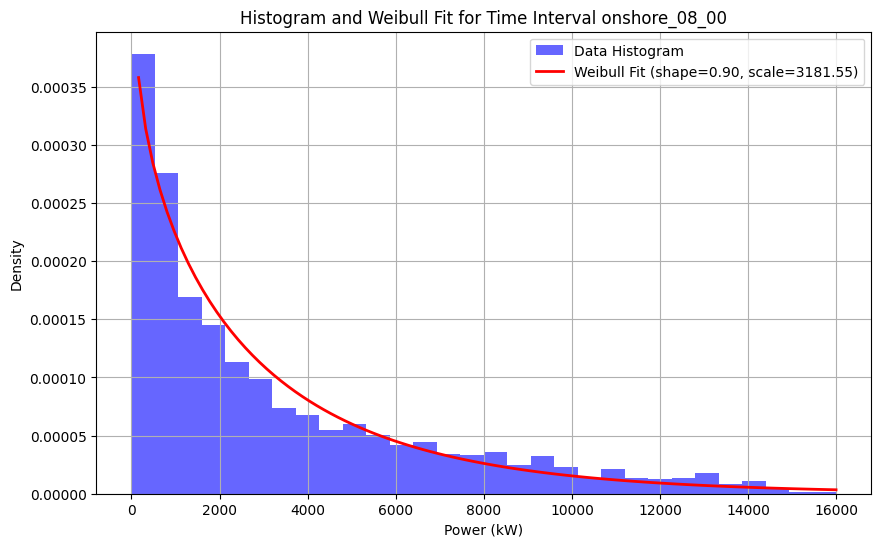

In [11]:
# Plot Weibull fit for a specific interval
plot_weibull_for_one_interval(reshaped, "onshore_08_00")

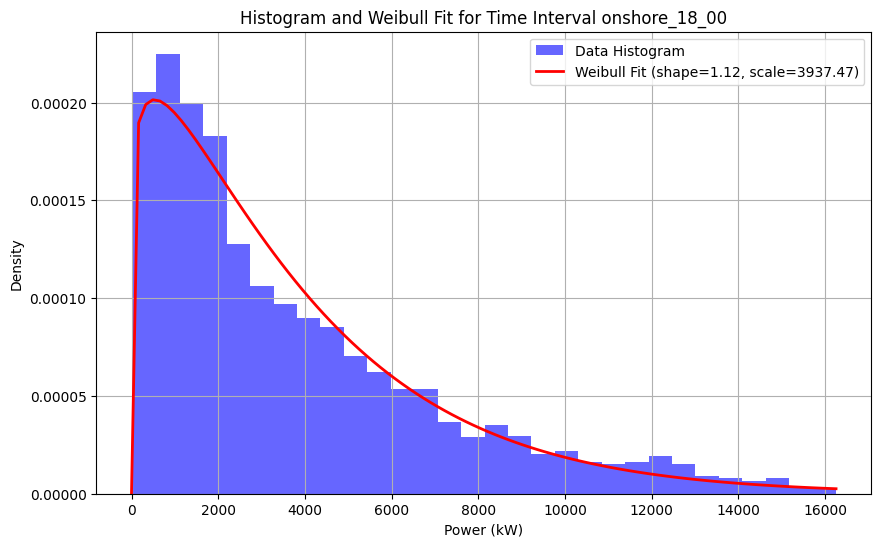

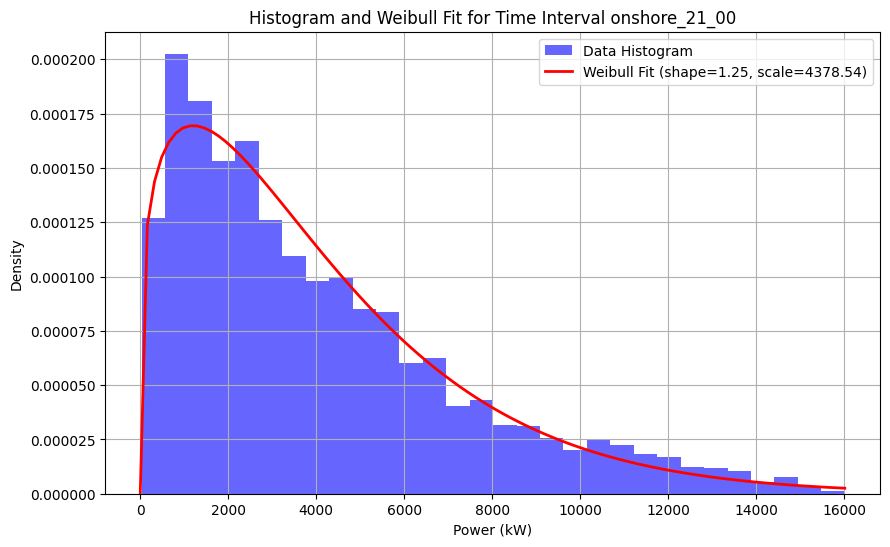

In [12]:
plot_weibull_for_one_interval(reshaped, "onshore_18_00")
plot_weibull_for_one_interval(reshaped, "onshore_21_00")

Plot the frequency distribution of the data and the weibull for a selected 15 minute time interval.

Interpretation:
- At 08:00 the most likely power is very small (Weibull would predict zero)
- At 18:00, 21:00 the most likely power is around 700-1000 kW

Implication for forecasting model:
- Has to take into account that different time intervals result in different distribution shapes


#### Analysis of the distribution of the daily delta Powers

- See below for a possible explanation as to why the mean is equal to 1

In [52]:
reshaped2 = add_previous_day_and_calculate_differences(aggregated_power)
reshaped2

,P_onshore_00_00,P_onshore_00_15,P_onshore_00_30,P_onshore_00_45,P_onshore_01_00,P_onshore_01_15,P_onshore_01_30,P_onshore_01_45,P_onshore_02_00,P_onshore_02_15,...,delta_P_onshore_21_30,delta_P_onshore_21_45,delta_P_onshore_22_00,delta_P_onshore_22_15,delta_P_onshore_22_30,delta_P_onshore_22_45,delta_P_onshore_23_00,delta_P_onshore_23_15,delta_P_onshore_23_30,delta_P_onshore_23_45
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1428.0,1379.0,1399.0,1448.0,1517.0,1511.0,1539.0,1575.0,1628.0,1685.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,595.0,650.0,696.0,735.0,738.0,774.0,853.0,939.0,985.0,1030.0,...,6497.0,6459.0,6426.0,6375.0,6365.0,6339.0,6233.0,6179.0,6163.0,6193.0
2016-01-03,6600.0,6634.0,6645.0,6644.0,6646.0,6764.0,6858.0,6846.0,6846.0,6847.0,...,-1436.0,-1474.0,-1532.0,-1464.0,-1525.0,-1516.0,-1445.0,-1443.0,-1438.0,-1501.0
2016-01-04,5069.0,4983.0,4867.0,4754.0,4739.0,4644.0,4676.0,4629.0,4584.0,4394.0,...,-3093.0,-3140.0,-3076.0,-3123.0,-3100.0,-3072.0,-3061.0,-3103.0,-3134.0,-3170.0
2016-01-05,2081.0,2115.0,2108.0,2082.0,2083.0,2045.0,2050.0,2116.0,2089.0,2010.0,...,-809.0,-754.0,-786.0,-759.0,-745.0,-786.0,-841.0,-795.0,-882.0,-929.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1.0009357454772303


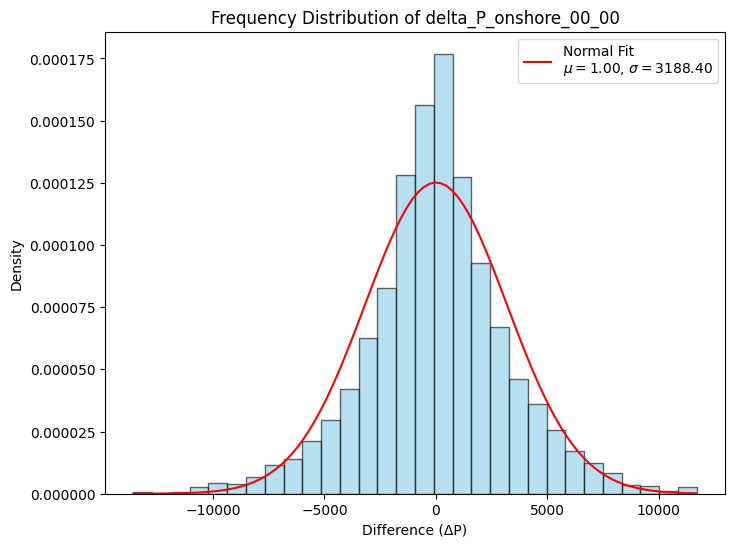

1.0087336244541485


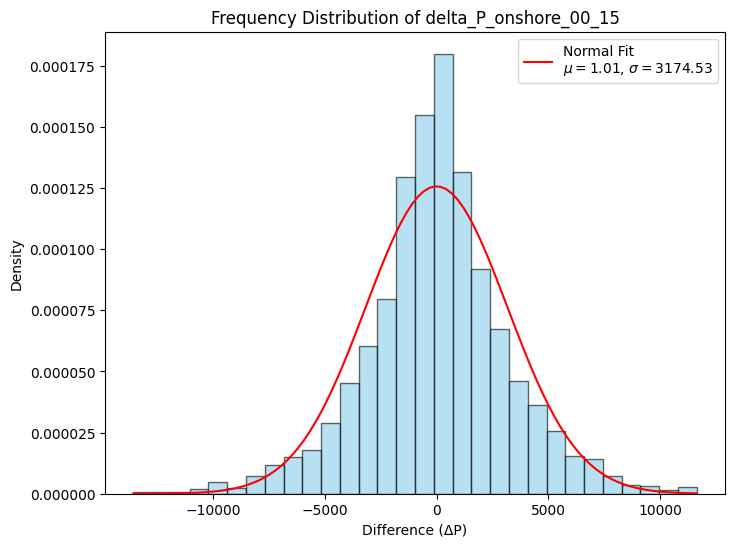

0.9887710542732376


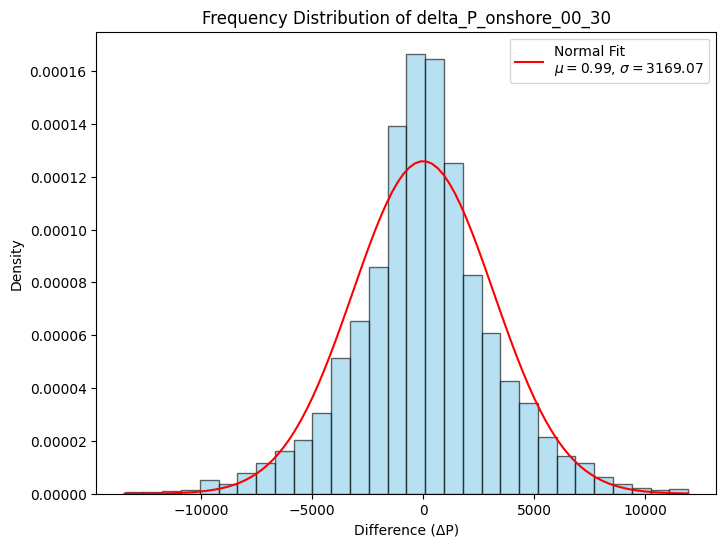

0.9457267623206488


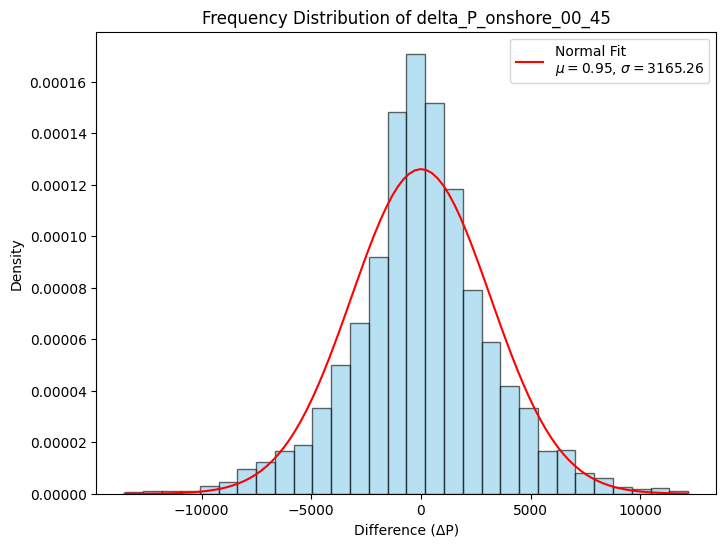

0.9026824703680599


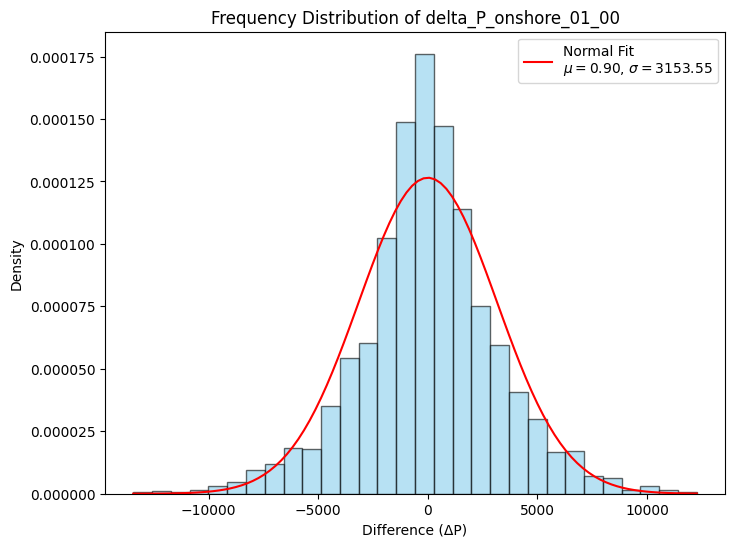

0.8880224578914535


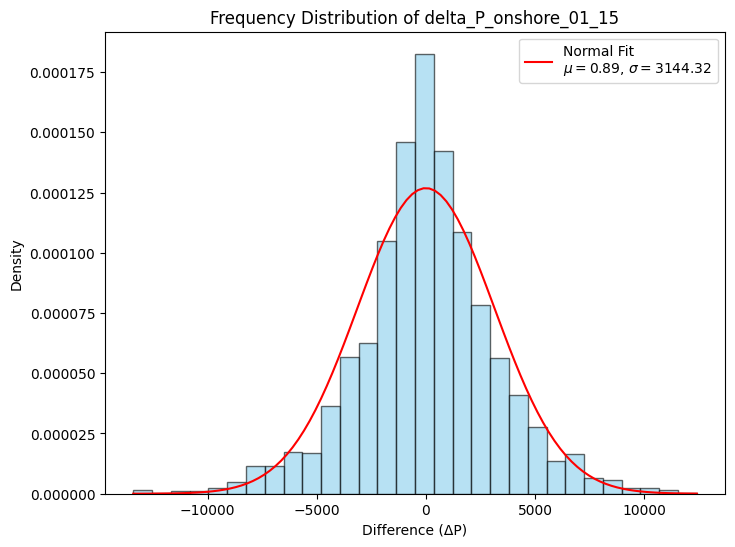

0.872426699937617


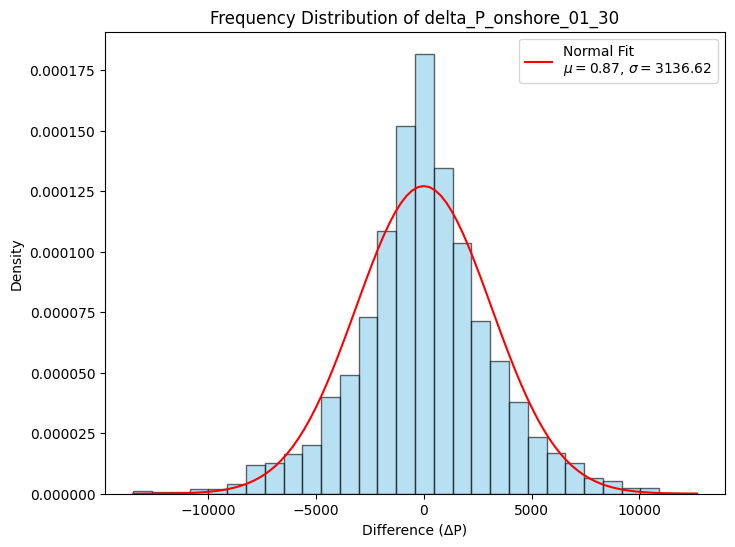

0.8583905177791641


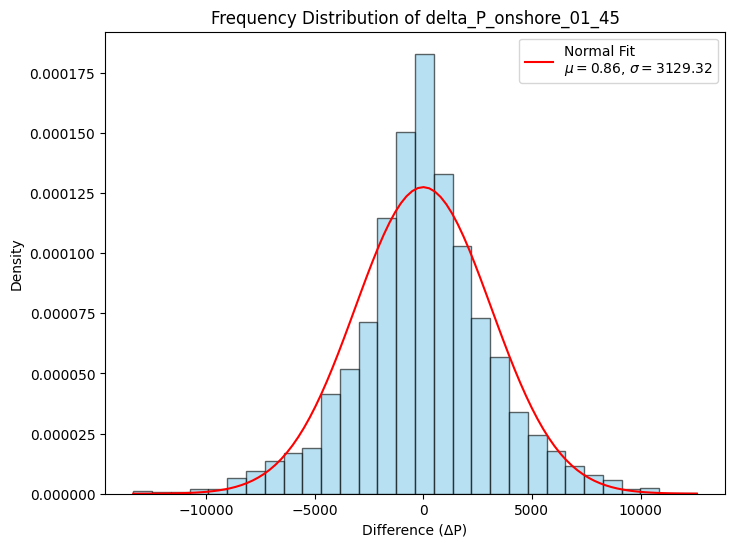

0.835308796007486


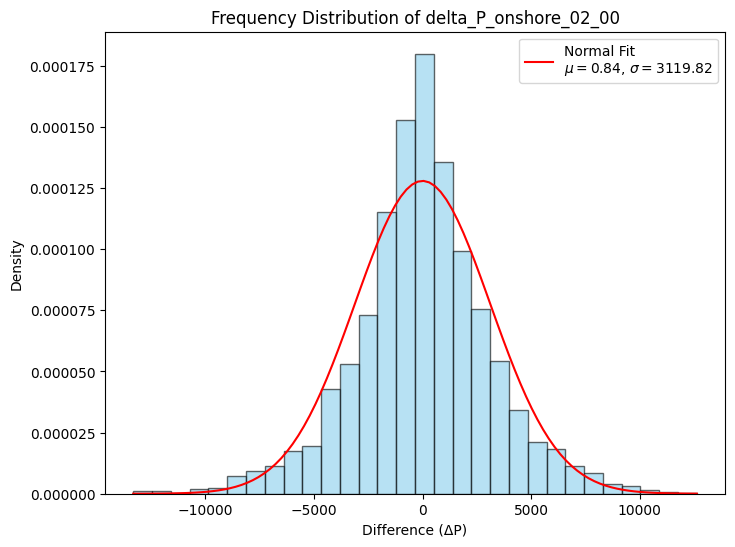

0.8452900810979413


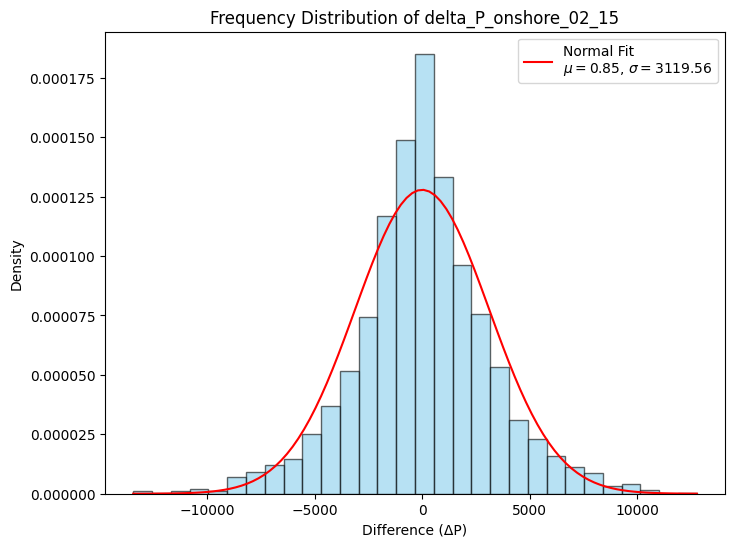

Overall Mean of all column means: 1.1248137795131268


In [14]:
plot_difference_histograms(reshaped2)

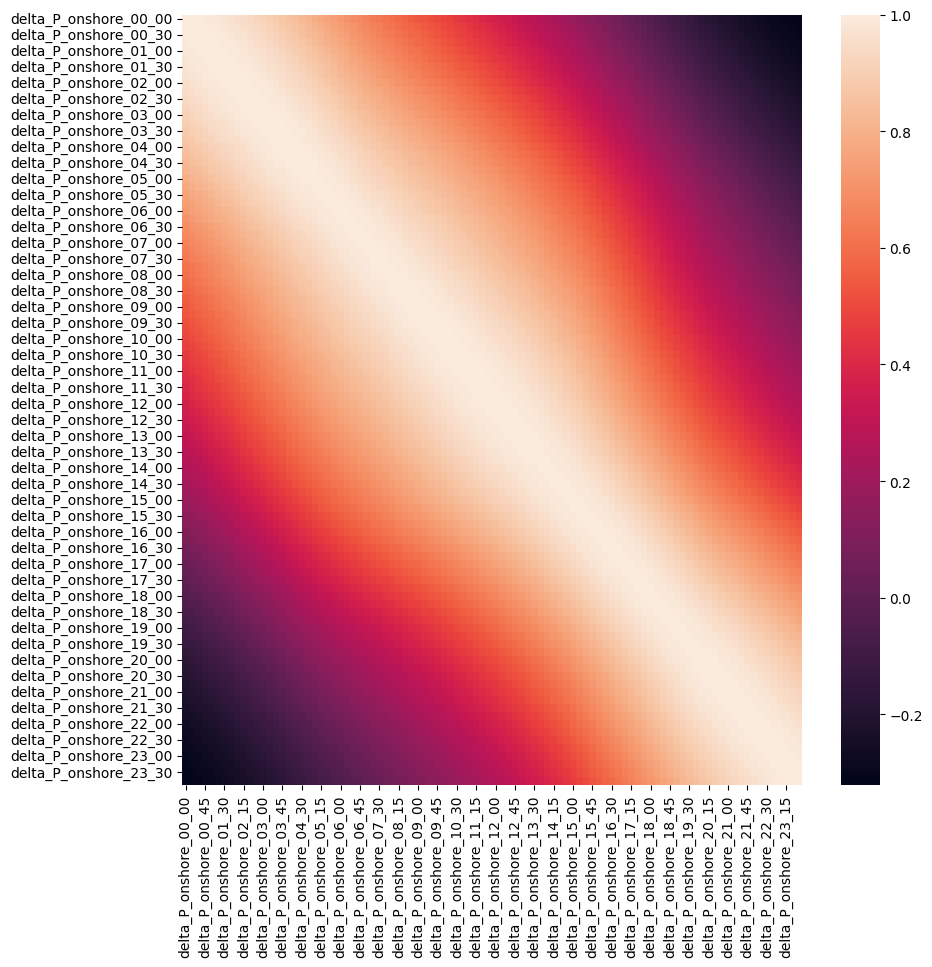

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

delta_columns = [col for col in reshaped2.columns if 'delta_P_' in col]
delta_data = reshaped2[delta_columns].dropna()  # Drop rows with NaN values
mean = np.mean(delta_data, axis=0)
corr = delta_data.corr()  # Computes the correlation matrix between columns

sns.heatmap(corr, ax=ax)
plt.show()

### Time Series of mean per month

Filtered data for onshore in 01/2019: 2976 records found.


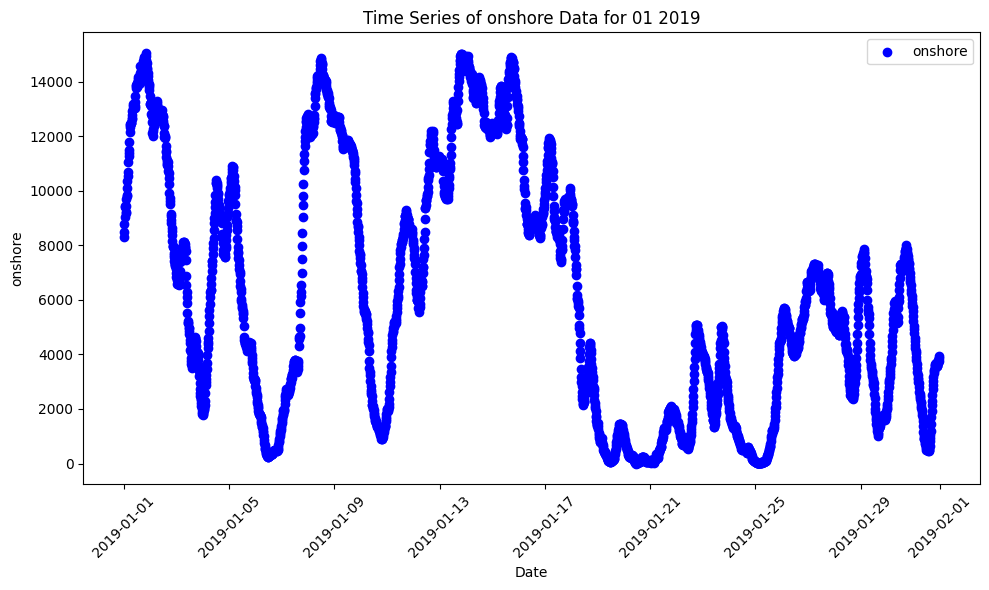

In [16]:
plot_power_data_for_specific_month(aggregated_power) ## January 2024

### First attempt to include installed capacity. Since data is updated yearly only, I need to interpolate. This is an approximation since in reality more capacity is not added continuously 

In [17]:
inst_cap = load_installed_capacity()

<Axes: >

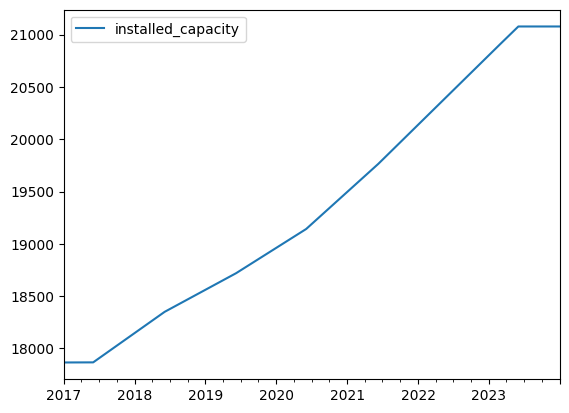

In [18]:
inst_cap.plot()

In [19]:
aggregated_power_inst_cap = pd.concat([aggregated_power, load_installed_capacity()])
aggregated_power_inst_cap

,offshore,onshore,installed_capacity
2016-01-01 00:00:00,21.0,1428.0,NaN
2016-01-01 00:15:00,27.0,1379.0,NaN
2016-01-01 00:30:00,24.0,1399.0,NaN
2016-01-01 00:45:00,20.0,1448.0,NaN
2016-01-01 01:00:00,16.0,1517.0,NaN
...,...,...,...
2023-12-31 22:45:00,NaN,NaN,21078.0
2023-12-31 23:00:00,NaN,NaN,21078.0
2023-12-31 23:15:00,NaN,NaN,21078.0
2023-12-31 23:30:00,NaN,NaN,21078.0


### The red line shows the maximum power output achieved and green the installed capacity. The increase is more or less parallel, showing that it makes sense to consider a normalized power output.

2016-01-01 00:00:00     1428.0
2016-01-01 00:15:00     1428.0
2016-01-01 00:30:00     1428.0
2016-01-01 00:45:00     1448.0
2016-01-01 01:00:00     1517.0
                        ...   
2023-12-31 22:45:00    16676.0
2023-12-31 23:00:00    16676.0
2023-12-31 23:15:00    16676.0
2023-12-31 23:30:00    16676.0
2023-12-31 23:45:00    16676.0
Name: onshore, Length: 561024, dtype: float64


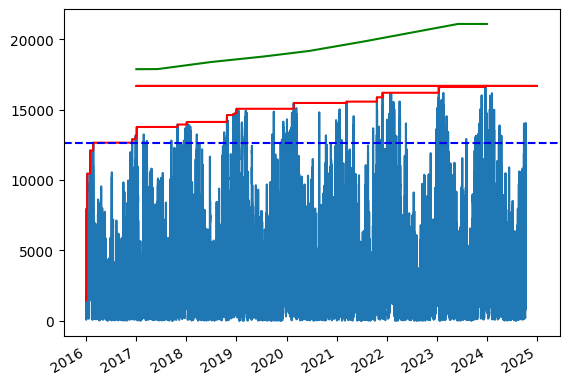

In [20]:
aggregated_power_inst_cap.onshore.plot()
aggregated_power_inst_cap.onshore.expanding().max().plot(color="red")
aggregated_power_inst_cap.installed_capacity.plot(color="green")
plt.axhline(y=12600, color='b', linestyle='--', label='Threshold (20000)')

print(aggregated_power_inst_cap.onshore.expanding().max())


### Explanation as to why the mean of the delta power distributions is 1 and not zero

Calculating the average daily increase in power produced using the max gives an increase of about 1.3 MW per day. This compares well with what we get from the average daily increase calculated from installed capacity. This explains why the mean of the delta power distribution P_t - P_t-1 is about 1

In [21]:
(16676.0-12600)/8.5 / 365

1.3137792103142627

In [22]:
(21078 - 17866)/7 / 365

1.2571428571428571

In [23]:
#[(x, df.resample('M').mean().onshore.autocorr(lag=x).item()) for x in range(1,13)]

In [24]:
#pd.plotting.autocorrelation_plot(df.resample('M').mean().offshore)

In [25]:
# Plot the data
#df.plot(title="Time Series Data")
#df2 = df.resample('D').mean()
#column = "onshore"
# 1. Autocorrelation and Partial Autocorrelation to detect periodicity
#lag_acf = acf(df2[column], nlags=40)
#lag_pacf = pacf(df2[column], nlags=40)
#display(lag_acf)
#display(lag_pacf)

In [26]:
# 2. Fit an ARMA model to the data (ARMA(p,q) model)
model = ARIMA(df[column], order=(2, 0, 2))  # ARMA is a special case of ARIMA(p, 0, q)
arma_model = model.fit()

# Print the summary of the fitted model
print(arma_model.summary())

# 3. Analyze the residuals to check for periodicity in the residuals
residuals = arma_model.resid

plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals of ARMA Model')
plt.show()

NameError: name 'df' is not defined

In [ ]:
# 4. Optionally, use FFT to find periodicity
fft_vals = np.fft.fft(df[column])
fft_freq = np.fft.fftfreq(len(fft_vals))

plt.figure(figsize=(10, 4))
plt.plot(fft_freq, np.abs(fft_vals))
plt.title('Frequency Spectrum')
plt.show()

In [ ]:
lag_acf

In [ ]:
lag_pacf

In [ ]:
df.onshore.hist(bins=30)

In [ ]:
df.offshore.hist(bins=30)

In [ ]:
sns.kdeplot(df.onshore)

In [ ]:
sns.kdeplot(df.offshore)

In [ ]:
df.Area.unique()

### Analysis with processed data

In [ ]:
aggregated_power_proc = aggregated_power.drop(columns='offshore')

Summary statistics for time frame: 2016-01-01 - 2024-12-31
First 5 rows of the dataframe:


,onshore
time,
2016-01-01 00:00:00,1428.0
2016-01-01 00:15:00,1379.0
2016-01-01 00:30:00,1399.0
2016-01-01 00:45:00,1448.0
2016-01-01 01:00:00,1517.0



Last 5 rows of the dataframe:


,onshore
time,
2024-12-31 22:45:00,NaN
2024-12-31 23:00:00,NaN
2024-12-31 23:15:00,NaN
2024-12-31 23:30:00,NaN
2024-12-31 23:45:00,NaN



Summary statistics of the dataframe for time frame: 2016-01-01 - 2024-12-31


,onshore
count,307842.000000
mean,3727.880780
std,3359.502551
min,0.000000
25%,1109.250000
50%,2634.000000
75%,5413.750000
max,16676.000000


Expected number of entries: 315648 (2016-01-01 00:00:00 - 2024-12-31 23:45:00) 
Actual number of entries: 315648

Shape of dataframe (rows, columns) for time frame: 2016-01-01 - 2024-12-31


(315648, 1)


Checking for duplicates in the index for time frame: 2016-01-01 - 2024-12-31
Index column has no duplicates.

Rows with NaN values for onshore:
In total there are: 7806 NaN values for time frame 2016-01-01 00:00:00 - 2024-12-31 23:45:00

First NaN value in 'onshore' found at index: 2024-10-11 16:30:00


,onshore
time,
2024-10-11 16:30:00,NaN
2024-10-11 16:45:00,NaN
2024-10-11 17:00:00,NaN
2024-10-11 17:15:00,NaN
2024-10-11 17:30:00,NaN
...,...
2024-12-31 22:45:00,NaN
2024-12-31 23:00:00,NaN
2024-12-31 23:15:00,NaN


Plotting histogram for: onshore for 2016-01-01 - 2024-12-31


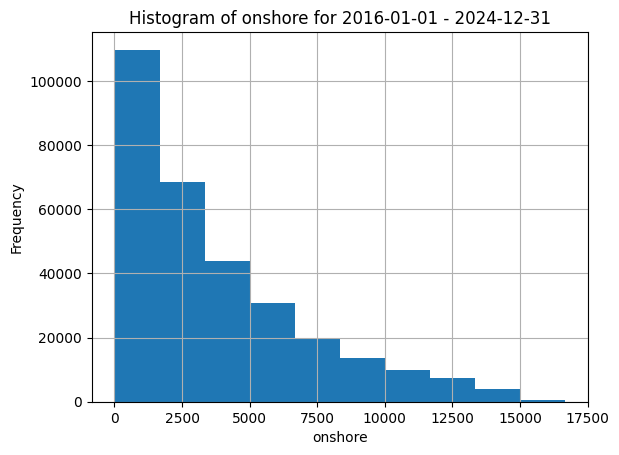


Plotting monthly time series of onshore data for the time period 2016-01-01 - 2024-12-31:


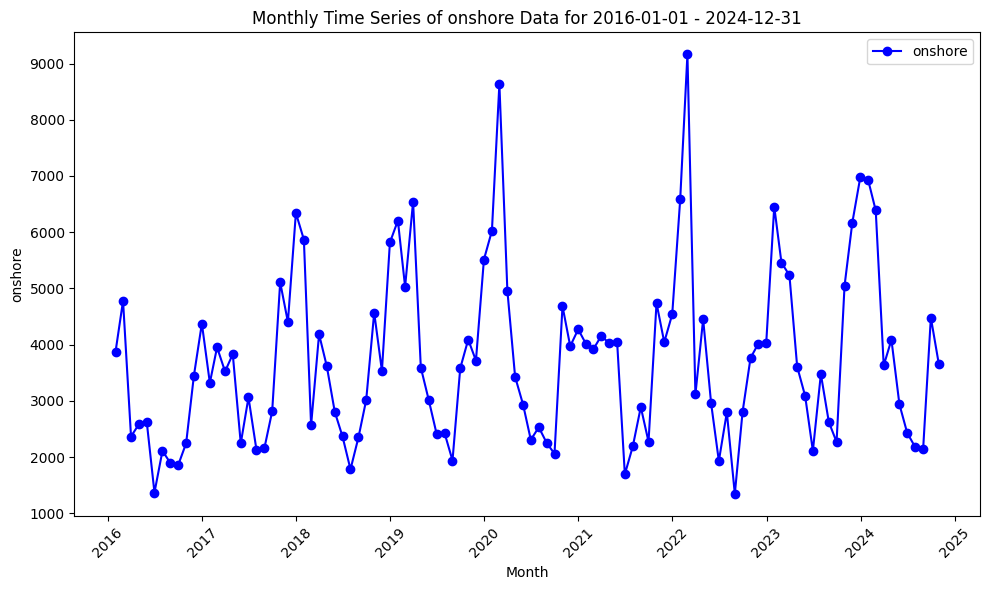

No wind speed columns found. Skipping wind speed plots.
Filtered data for onshore in 04/2023: 2880 records found.


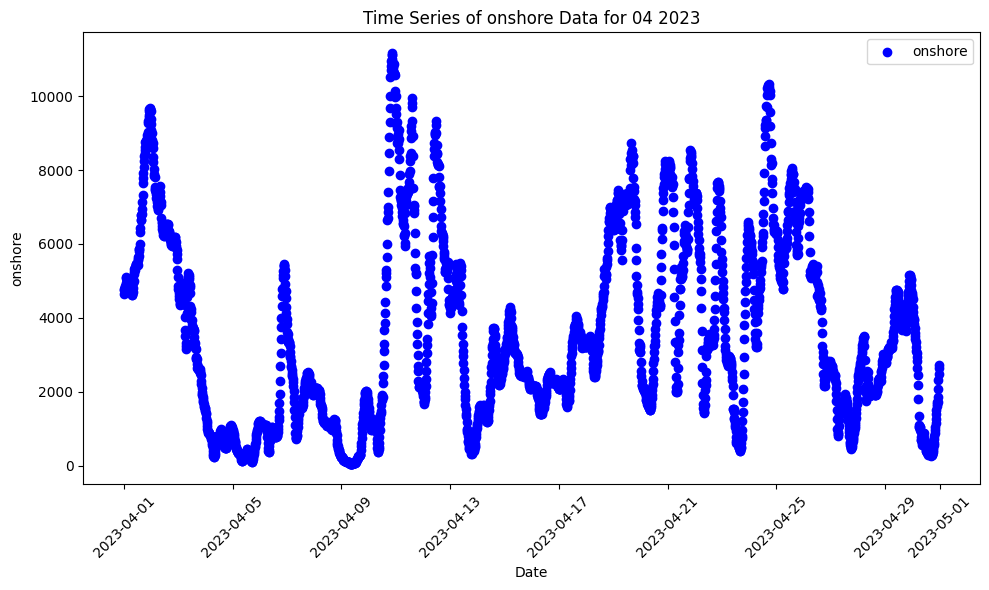

In [28]:
explorative_analysis(aggregated_power_proc)

### Check whether power in onshore makes sense compared to the installed capacity

between 2016-2024 the max onshore power value is 16676.000000 MW, the min onshore power is 0 MW

The installed capacity plot shows that the min installed capacity was 17866.0 MW



In [30]:
inst_cap.min()

installed_capacity    17866.0
dtype: float64

### Check that there are no missing values
Explorative analysis shows that:
- Expected number of entries: 315648 (2016-01-01 00:00:00 - 2024-12-31 23:45:00) 
- Actual number of entries: 315648

### Split into Train, Test dataset

- 2023 is the validation dataset
- 2024 is the test dataset: at this point (24.11.2024 still incomplete. Will download at the start of 2025)
- 2016-2022 Training dataset

In [31]:
# Set the split dates
train_end_date = "2022-12-31 23:45:00"       # End date for the training set
validation_end_date = "2023-12-31 23:45:00"  # End date for the validation set

# Call the function with the DataFrame `df`
train_data, validation_data, test_data = to_train_validation_test_data(
    df=aggregated_power_proc,
    train_end_date=train_end_date,
    validation_end_date=validation_end_date
)

# of training observations: 245472 | 77.77%
# of validation observations: 35040 | 11.10%
# of test observations: 35136 | 11.13%


In [32]:
train_data

,onshore
time,
2016-01-01 00:00:00,1428.0
2016-01-01 00:15:00,1379.0
2016-01-01 00:30:00,1399.0
2016-01-01 00:45:00,1448.0
2016-01-01 01:00:00,1517.0
...,...
2022-12-31 22:45:00,10379.0
2022-12-31 23:00:00,9791.0
2022-12-31 23:15:00,9810.0


In [33]:
validation_data

,onshore
time,
2023-01-01 00:00:00,9898.0
2023-01-01 00:15:00,10104.0
2023-01-01 00:30:00,9738.0
2023-01-01 00:45:00,10196.0
2023-01-01 01:00:00,9768.0
...,...
2023-12-31 22:45:00,7960.0
2023-12-31 23:00:00,8086.0
2023-12-31 23:15:00,7968.0


In [34]:
test_data

,onshore
time,
2024-01-01 00:00:00,8151.0
2024-01-01 00:15:00,8302.0
2024-01-01 00:30:00,8081.0
2024-01-01 00:45:00,8187.0
2024-01-01 01:00:00,8072.0
...,...
2024-12-31 22:45:00,NaN
2024-12-31 23:00:00,NaN
2024-12-31 23:15:00,NaN


In [43]:
train_transf = minute_to_daily_50Hertz(train_data)
train_transf.head()

,onshore_00_00,onshore_00_15,onshore_00_30,onshore_00_45,onshore_01_00,onshore_01_15,onshore_01_30,onshore_01_45,onshore_02_00,onshore_02_15,...,onshore_21_30,onshore_21_45,onshore_22_00,onshore_22_15,onshore_22_30,onshore_22_45,onshore_23_00,onshore_23_15,onshore_23_30,onshore_23_45
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1428.0,1379.0,1399.0,1448.0,1517.0,1511.0,1539.0,1575.0,1628.0,1685.0,...,316.0,350.0,359.0,385.0,425.0,432.0,467.0,503.0,509.0,528.0
2016-01-02,595.0,650.0,696.0,735.0,738.0,774.0,853.0,939.0,985.0,1030.0,...,6813.0,6809.0,6785.0,6760.0,6790.0,6771.0,6700.0,6682.0,6672.0,6721.0
2016-01-03,6600.0,6634.0,6645.0,6644.0,6646.0,6764.0,6858.0,6846.0,6846.0,6847.0,...,5377.0,5335.0,5253.0,5296.0,5265.0,5255.0,5255.0,5239.0,5234.0,5220.0
2016-01-04,5069.0,4983.0,4867.0,4754.0,4739.0,4644.0,4676.0,4629.0,4584.0,4394.0,...,2284.0,2195.0,2177.0,2173.0,2165.0,2183.0,2194.0,2136.0,2100.0,2050.0
2016-01-05,2081.0,2115.0,2108.0,2082.0,2083.0,2045.0,2050.0,2116.0,2089.0,2010.0,...,1475.0,1441.0,1391.0,1414.0,1420.0,1397.0,1353.0,1341.0,1218.0,1121.0


In [36]:
val_transf = minute_to_daily_50Hertz(validation_data)
val_transf

,onshore_00_00,onshore_00_15,onshore_00_30,onshore_00_45,onshore_01_00,onshore_01_15,onshore_01_30,onshore_01_45,onshore_02_00,onshore_02_15,...,onshore_21_30,onshore_21_45,onshore_22_00,onshore_22_15,onshore_22_30,onshore_22_45,onshore_23_00,onshore_23_15,onshore_23_30,onshore_23_45
date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,9898.0,10104.0,9738.0,10196.0,9768.0,10258.0,10073.0,10285.0,9368.0,8769.0,...,4380.0,4365.0,4341.0,4401.0,4455.0,4503.0,4735.0,4865.0,4911.0,5009.0
2023-01-02,5146.0,5385.0,5411.0,5444.0,6019.0,6407.0,6554.0,6829.0,7190.0,7594.0,...,6773.0,6906.0,6979.0,7146.0,7211.0,7261.0,7225.0,7435.0,7682.0,7531.0
2023-01-03,7413.0,7362.0,7164.0,7226.0,7126.0,6851.0,6659.0,6530.0,6387.0,6316.0,...,6258.0,6365.0,6562.0,6731.0,6796.0,6982.0,6889.0,7024.0,7172.0,7183.0
2023-01-04,7421.0,7723.0,7918.0,8015.0,7931.0,8083.0,8143.0,8233.0,8001.0,8010.0,...,14220.0,14133.0,13917.0,13665.0,13540.0,13863.0,13882.0,13208.0,12611.0,12367.0
2023-01-05,12678.0,13029.0,12980.0,12896.0,12478.0,12502.0,12875.0,12976.0,12810.0,12814.0,...,1452.0,1347.0,1256.0,1117.0,1074.0,1036.0,1113.0,1129.0,1145.0,1219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,9581.0,9409.0,9063.0,8826.0,8618.0,8470.0,8388.0,8331.0,8251.0,8006.0,...,9877.0,10105.0,10353.0,10258.0,10305.0,10367.0,10574.0,10606.0,10841.0,11070.0
2023-12-28,11063.0,10673.0,10423.0,10536.0,10770.0,10718.0,10749.0,10748.0,10812.0,11129.0,...,13082.0,13092.0,13183.0,13374.0,13402.0,13305.0,13023.0,12374.0,12166.0,12017.0
2023-12-29,11821.0,11741.0,11638.0,11628.0,11617.0,11356.0,11484.0,11571.0,11658.0,11607.0,...,11213.0,11256.0,11598.0,11997.0,12021.0,12213.0,12306.0,12041.0,11928.0,11864.0


In [37]:
test_transf = minute_to_daily_50Hertz(test_data)
test_transf

,onshore_00_00,onshore_00_15,onshore_00_30,onshore_00_45,onshore_01_00,onshore_01_15,onshore_01_30,onshore_01_45,onshore_02_00,onshore_02_15,...,onshore_21_30,onshore_21_45,onshore_22_00,onshore_22_15,onshore_22_30,onshore_22_45,onshore_23_00,onshore_23_15,onshore_23_30,onshore_23_45
date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,8151.0,8302.0,8081.0,8187.0,8072.0,8125.0,8363.0,8413.0,8301.0,8138.0,...,7175.0,6946.0,6786.0,6531.0,6433.0,6194.0,6026.0,5871.0,5731.0,5519.0
2024-01-02,5301.0,5122.0,4886.0,4702.0,4676.0,4470.0,4355.0,4254.0,4216.0,4265.0,...,9575.0,9668.0,9955.0,10179.0,10237.0,10221.0,10152.0,10102.0,10181.0,10245.0
2024-01-03,10327.0,10424.0,10421.0,10464.0,10638.0,10804.0,10890.0,10940.0,10857.0,10746.0,...,9473.0,9425.0,9417.0,9407.0,9468.0,9530.0,9502.0,9349.0,9250.0,9143.0
2024-01-04,9127.0,9115.0,9197.0,9212.0,9162.0,9348.0,9393.0,9276.0,9318.0,9390.0,...,648.0,629.0,603.0,558.0,526.0,524.0,553.0,571.0,590.0,609.0
2024-01-05,644.0,674.0,737.0,800.0,827.0,874.0,936.0,956.0,1003.0,1062.0,...,4076.0,4065.0,3957.0,3867.0,3810.0,3733.0,3629.0,3576.0,3499.0,3447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
def model(p_t, bias=1):
    p_tpp = p_t.shift(1) + bias
    return p_tpp


col = 'onshore_01_30'
p_t_train = train_transf[col]
p_t_val = val_transf[col]

print("Model: trend=1")

res_train = pd.DataFrame({"p": p_t_train, "p_hat": model(p_t_train)})
print("Train: MSE =", res_train.apply(lambda s: (s.p - s.p_hat)**2, axis=1).mean().item())

res_val = pd.DataFrame({"p": p_t_val, "p_hat": model(p_t_val)})
print("Val: MSE =", res_val.apply(lambda s: (s.p - s.p_hat)**2, axis=1).mean().item())

print(80*"-")

trend = (p_t_train - p_t_train.shift(1)).mean().item()
print(f"Model: trend={trend} (Δpt.mean())")
res_train = pd.DataFrame({"p": p_t_train, "p_hat": model(p_t_train, bias=trend)})
print("Train: MSE =", res_train.apply(lambda s: (s.p - s.p_hat)**2, axis=1).mean().item())

res_val = pd.DataFrame({"p": p_t_val, "p_hat": model(p_t_val, bias=trend)})
print("Val: MSE =", res_val.apply(lambda s: (s.p - s.p_hat)**2, axis=1).mean().item())


Model: trend=1
Train: MSE = 9147722.766431924
Val: MSE = 12415262.887362637
--------------------------------------------------------------------------------
Model: trend=2.9151017214397497 (Δpt.mean())
Train: MSE = 9147719.09881732
Val: MSE = 12415330.710884908


In [47]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(train_transf[col], order=(0,1,0), trend="t")
res = model.fit()
print(res.summary())
print(res.params)

                               SARIMAX Results                                
Dep. Variable:          onshore_01_30   No. Observations:                 2557
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -32861.830
Date:                Mon, 25 Nov 2024   AIC                          65727.661
Time:                        15:05:22   BIC                          65739.353
Sample:                    01-01-2016   HQIC                         65731.901
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.9151   1.53e+05   1.91e-05      1.000      -3e+05       3e+05
sigma2      2.338e+10   9.25e+08     25.269      0.000    2.16e+10    2.52e+10
Ljung-Box (L1) (Q):                 232.19   Jarque-

c:\Users\Manuel\Documents\Masterarbeit\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Manuel\Documents\Masterarbeit\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Manuel\Documents\Masterarbeit\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [48]:
res.forecast("2023-01-01", "2023-12-31")

2023-01-01    1536.084898
Freq: D, dtype: float64

In [49]:
res.forecast(365), val_transf[col]

(2023-01-01     8992.915102
 2023-01-02     8995.830203
 2023-01-03     8998.745305
 2023-01-04     9001.660407
 2023-01-05     9004.575509
                   ...     
 2023-12-27    10042.351721
 2023-12-28    10045.266823
 2023-12-29    10048.181925
 2023-12-30    10051.097027
 2023-12-31    10054.012128
 Freq: D, Name: predicted_mean, Length: 365, dtype: float64,
 date
 2023-01-01    10073.0
 2023-01-02     6554.0
 2023-01-03     6659.0
 2023-01-04     8143.0
 2023-01-05    12875.0
                ...   
 2023-12-27     8388.0
 2023-12-28    10749.0
 2023-12-29    11484.0
 2023-12-30    11557.0
 2023-12-31     4340.0
 Name: onshore_01_30, Length: 365, dtype: float64)

date
2023-01-01    10073.0
2023-01-02     6554.0
2023-01-03     6659.0
2023-01-04     8143.0
2023-01-05    12875.0
               ...   
2023-12-27     8388.0
2023-12-28    10749.0
2023-12-29    11484.0
2023-12-30    11557.0
2023-12-31     4340.0
Name: onshore_01_30, Length: 365, dtype: float64